In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean


def func(x,m,b):
    return m*x + b

In [49]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_11142024.xlsx'
df_TrueNoise = pd.read_excel(fileloc,sheet_name = 'TrueNoise_SNR_50') 
df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 

df_TrueNoise_SNR30 = pd.read_excel(fileloc,sheet_name = 'TrueNoise_SNR_30') 
df_AveragedNoise_SNR30 = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_30') 



df_TrueNoise_anomalous = pd.read_excel(fileloc,sheet_name = 'TrueNoise_anomalous_SNR_50') 
df_AveragedNoise_anomalous = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_anomalous_SNR_50') 

df_TrueNoise_SNR30_anomalous = pd.read_excel(fileloc,sheet_name = 'TrueNoise_anomalous_SNR_30') 
df_AveragedNoise_SNR30_anomalous = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_anomalous_SNR_30') 



df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 

#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

b_values9 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380


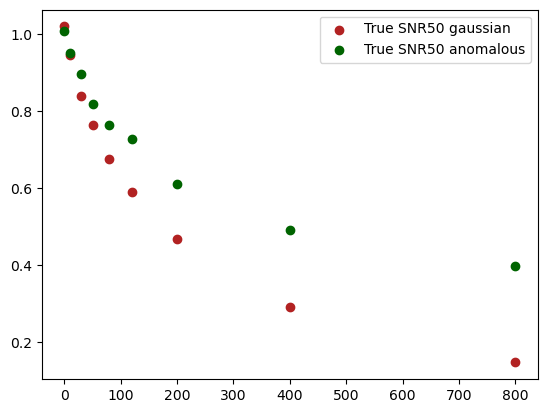

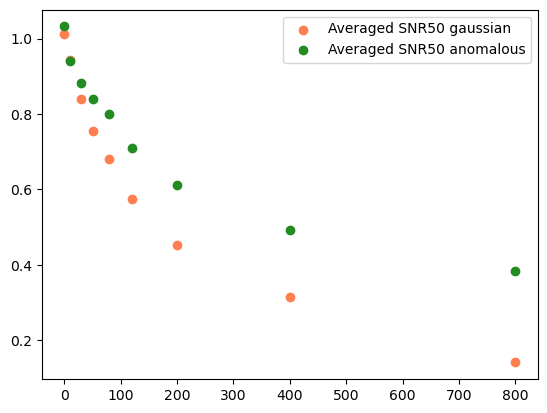

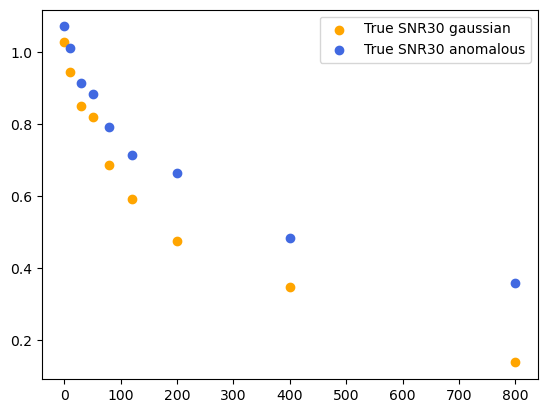

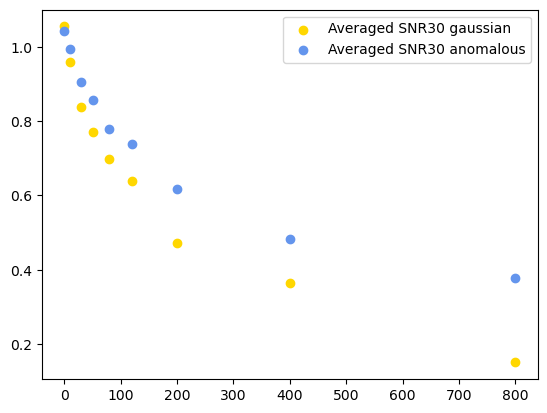

In [62]:
n=1
pl.scatter(b_values9,list(df_TrueNoise.iloc[n,2:]), label = 'True SNR50 gaussian', color = 'firebrick')
pl.scatter(b_values9,list(df_TrueNoise_anomalous.iloc[n,2:]), label = 'True SNR50 anomalous', color = 'darkgreen')
pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise.iloc[n,2:]), label = 'Averaged SNR50 gaussian', color = 'coral')
pl.scatter(b_values9,list(df_AveragedNoise_anomalous.iloc[n,2:]), label = 'Averaged SNR50 anomalous', color = 'forestgreen')
pl.legend( )
pl.show()


pl.scatter(b_values9,list(df_TrueNoise_SNR30.iloc[n,2:]), label = 'True SNR30 gaussian', color = 'orange')
pl.scatter(b_values9,list(df_TrueNoise_SNR30_anomalous.iloc[n,2:]), label = 'True SNR30 anomalous', color = 'royalblue')
pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise_SNR30.iloc[n,2:]), label = 'Averaged SNR30 gaussian', color = 'gold')
pl.scatter(b_values9,list(df_AveragedNoise_SNR30_anomalous.iloc[n,2:]), label = 'Averaged SNR30 anomalous', color = 'cornflowerblue')
pl.legend( )
pl.show()

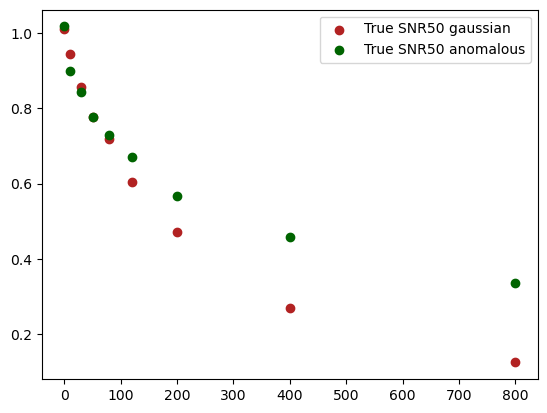

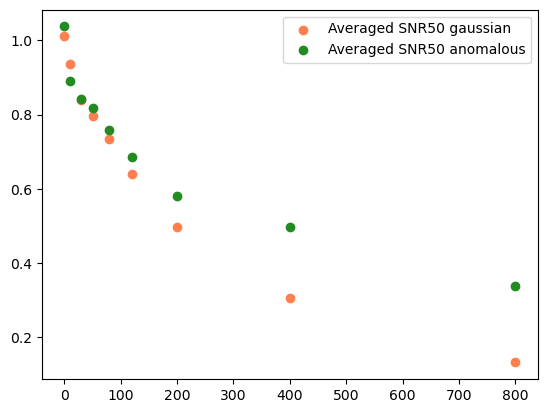

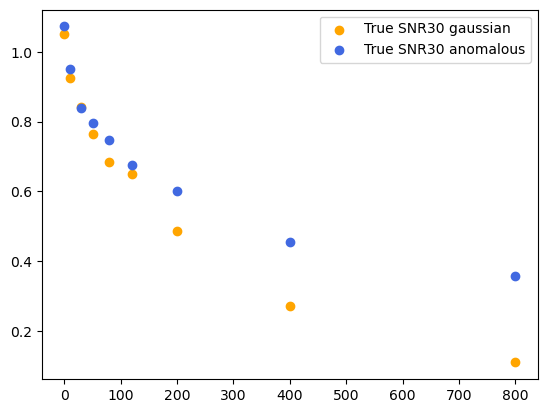

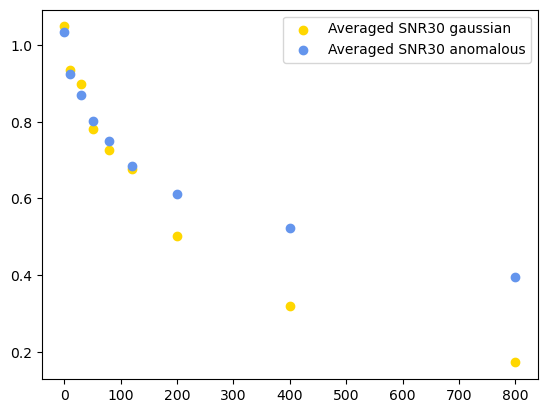

In [63]:
n=2
pl.scatter(b_values9,list(df_TrueNoise.iloc[n,2:]), label = 'True SNR50 gaussian', color = 'firebrick')
pl.scatter(b_values9,list(df_TrueNoise_anomalous.iloc[n,2:]), label = 'True SNR50 anomalous', color = 'darkgreen')

pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise.iloc[n,2:]), label = 'Averaged SNR50 gaussian', color = 'coral')
pl.scatter(b_values9,list(df_AveragedNoise_anomalous.iloc[n,2:]), label = 'Averaged SNR50 anomalous', color = 'forestgreen')
pl.legend( )
pl.show()


pl.scatter(b_values9,list(df_TrueNoise_SNR30.iloc[n,2:]), label = 'True SNR30 gaussian', color = 'orange')
pl.scatter(b_values9,list(df_TrueNoise_SNR30_anomalous.iloc[n,2:]), label = 'True SNR30 anomalous', color = 'royalblue')
pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise_SNR30.iloc[n,2:]), label = 'Averaged SNR30 gaussian', color = 'gold')
pl.scatter(b_values9,list(df_AveragedNoise_SNR30_anomalous.iloc[n,2:]), label = 'Averaged SNR30 anomalous', color = 'cornflowerblue')
pl.legend( )
pl.show()

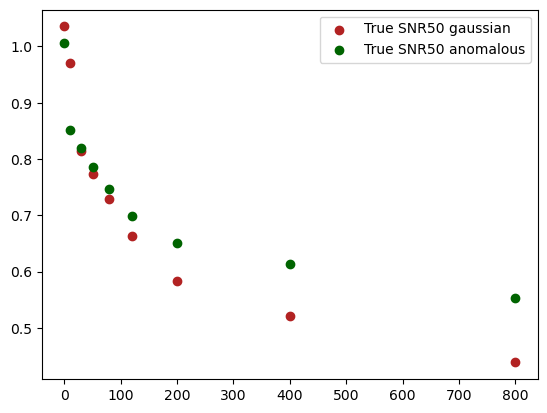

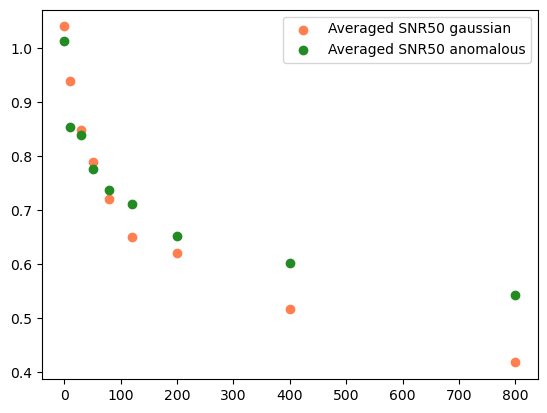

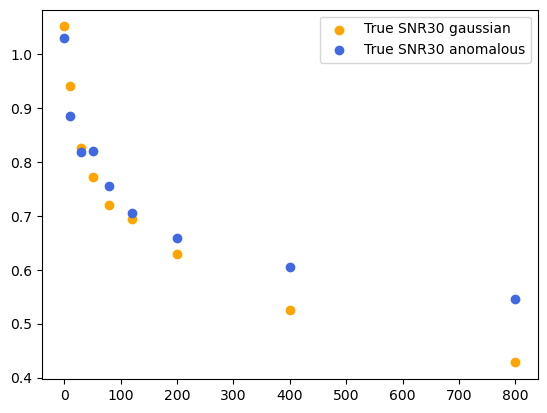

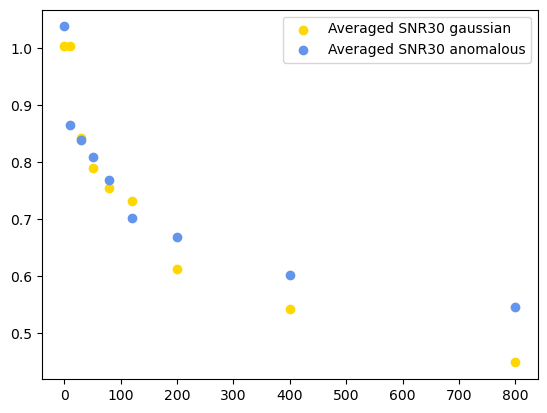

In [64]:
n=100
pl.scatter(b_values9,list(df_TrueNoise.iloc[n,2:]), label = 'True SNR50 gaussian', color = 'firebrick')
pl.scatter(b_values9,list(df_TrueNoise_anomalous.iloc[n,2:]), label = 'True SNR50 anomalous', color = 'darkgreen')

pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise.iloc[n,2:]), label = 'Averaged SNR50 gaussian', color = 'coral')
pl.scatter(b_values9,list(df_AveragedNoise_anomalous.iloc[n,2:]), label = 'Averaged SNR50 anomalous', color = 'forestgreen')
pl.legend( )
pl.show()


pl.scatter(b_values9,list(df_TrueNoise_SNR30.iloc[n,2:]), label = 'True SNR30 gaussian', color = 'orange')
pl.scatter(b_values9,list(df_TrueNoise_SNR30_anomalous.iloc[n,2:]), label = 'True SNR30 anomalous', color = 'royalblue')
pl.legend( )
pl.show()

pl.scatter(b_values9,list(df_AveragedNoise_SNR30.iloc[n,2:]), label = 'Averaged SNR30 gaussian', color = 'gold')
pl.scatter(b_values9,list(df_AveragedNoise_SNR30_anomalous.iloc[n,2:]), label = 'Averaged SNR30 anomalous', color = 'cornflowerblue')
pl.legend( )
pl.show()